## Capstone Project

#### Web Scrapping of NCDC webpage

##  1. Requesting the web Page

In [1]:
# import the necessary modules
import os  # module for navigating your machine(e.g, file directories)
import requests  # module for requesting url
from bs4 import BeautifulSoup as soup  # module for parsing the webpages
import pandas as pd  # module for handling and manupulating data
import numpy as np   # module for dealing with arrays
import seaborn as sns  
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import csv  # module for handling csv file
from datetime import datetime as dt # module for working with date and time
date = dt.now().strftime("%Y-%m-%d")
date

print("Successfully imported necessary modules")

Successfully imported necessary modules


In [2]:
# Defining the url where the web page can be accessed
url = "https://covid19.ncdc.gov.ng/"

# request the url
response = requests.get(url, allow_redirects= True)
response.status_code

200

## 2. Parsing the web page

In [3]:
# Extracting the contents of the web page from the response
soup_response = soup(response.text, "html.parser")  # parse the text as a beautiful object
# soup_sample = soup(response.text[:1000], "html.parser")  # parse a sample of the text

In [4]:
# Find the table containing the state level statistics
table = soup_response.find("table", id= "custom1").find('tbody') 
rows = table.find_all("tr", style= "")

In [5]:
# Extract the information in each row in the table
country_info = []
for row in rows:
    columns = row.find_all("td")
    state_info = [column.text.strip() for column in columns]
    country_info.append(state_info)
  
    
print(country_info[:10])
print("\r")
print("Number of rows in table: {}".format(len(country_info)))
# print("\r")

[['Lagos', '104,187', '1,044', '102,372', '771'], ['FCT', '29,508', '19', '29,240', '249'], ['Rivers', '18,105', '27', '17,923', '155'], ['Kaduna', '11,619', '1', '11,529', '89'], ['Oyo', '10,352', '6', '10,144', '202'], ['Plateau', '10,335', '7', '10,253', '75'], ['Edo', '7,927', '4', '7,601', '322'], ['Delta', '5,813', '531', '5,170', '112'], ['Ogun', '5,810', '11', '5,717', '82'], ['Kano', '5,359', '61', '5,171', '127']]

Number of rows in table: 37


In [6]:
# We save the result of the scrape in a file
try:
    os.mkdir("./desktop")
except OSError as error:
    print("Folder already exists")
    
variables = ["States Affected", "No. of Cases (Lab Confirmed)", "No. of Cases (on admission)",
             "No. Discharged", "No. of Deaths"]

outfile = "./desktop/covid-19-state-statistics-" + date + ".csv"
print(outfile)
with open(outfile, "w", newline= "") as f:
    writer = csv.writer(f)
    writer.writerow(variables)
    for state in country_info:
        writer.writerow(state)

Folder already exists
./desktop/covid-19-state-statistics-2022-11-29.csv


In [7]:
# Finally, we check the file was created; if so we load it into python and examine its contents:
df = pd.read_csv(outfile, encoding= "ISO-8859-1", index_col= False)
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"104,187","1,044","102,372",771
1,FCT,"29,508",19,"29,240",249
2,Rivers,"18,105",27,"17,923",155
3,Kaduna,"11,619",1,"11,529",89
4,Oyo,"10,352",6,"10,144",202


In [8]:
# Renaming the columns of the scrapped data
df.rename(columns= {"States Affected":"States_Affected", "No. of Cases (Lab Confirmed)":"No_of_Lab_Confirmed_Cases", "No. of Cases (on admission)":"No_of_Admission_cases", "No. Discharged":"No_of_Discharged_Cases", "No. of Deaths":"No_of_Death_Cases"}, inplace= True)
df.head()

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Admission_cases,No_of_Discharged_Cases,No_of_Death_Cases
0,Lagos,"104,187","1,044","102,372",771
1,FCT,"29,508",19,"29,240",249
2,Rivers,"18,105",27,"17,923",155
3,Kaduna,"11,619",1,"11,529",89
4,Oyo,"10,352",6,"10,144",202


In [9]:
# Removing the comma from the selected columns in the dataframe
columns = ["No_of_Lab_Confirmed_Cases", "No_of_Admission_cases" ,"No_of_Discharged_Cases"]
for col in columns:
    df[col] = [i.replace(",", "") if "," in i else i for i in df[col] ]
    

df.head()

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Admission_cases,No_of_Discharged_Cases,No_of_Death_Cases
0,Lagos,104187,1044,102372,771
1,FCT,29508,19,29240,249
2,Rivers,18105,27,17923,155
3,Kaduna,11619,1,11529,89
4,Oyo,10352,6,10144,202


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   States_Affected            37 non-null     object
 1   No_of_Lab_Confirmed_Cases  37 non-null     object
 2   No_of_Admission_cases      37 non-null     object
 3   No_of_Discharged_Cases     37 non-null     object
 4   No_of_Death_Cases          37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [11]:
# Changing the columns from object to integer 
for col in columns:
    df[col] = df[col].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   States_Affected            37 non-null     object
 1   No_of_Lab_Confirmed_Cases  37 non-null     int32 
 2   No_of_Admission_cases      37 non-null     int32 
 3   No_of_Discharged_Cases     37 non-null     int32 
 4   No_of_Death_Cases          37 non-null     int64 
dtypes: int32(3), int64(1), object(1)
memory usage: 1.1+ KB


## Importing Data From John Hopkins University Repository

In [12]:
# Importing the death cases dataset from John Hopkins University Repository
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_df = pd.read_csv(confirmed_url)
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/22,11/20/22,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205039,205146,205229,205324,205391,205506,205541,205612,205612,205802
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333246,333256,333257,333282,333293,333305,333316,333322,333330,333330
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271011,271023,271028,271035,271041,271050,271057,271061,271061,271079
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,46824,46824,46824,46824,46824
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,104491,104491,104491,104491,104491,104491


In [13]:
# Filtering Nigeria data from the imported dataset
confirmed_df_1 = confirmed_df[confirmed_df["Country/Region"] == "Nigeria"]
confirmed_df_1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/22,11/20/22,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22
206,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,266283,266283,266283,266283,266283,266283,266283,266283,266283,266283


In [14]:
# Dropping columns from the dataframe
confirmed_df_1.drop(["Province/State", "Country/Region", "Lat", "Long"], axis = 1, inplace= True)

In [15]:
# Transposing the rows of the dataframe to column
confirmed_df_2 = confirmed_df_1.T
confirmed_df_2.head()

,206
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [16]:
# Renaming the columns of the new Series
confirmed_df_2.rename(columns= {206 : "Confirmed_Cases"}, inplace= True)
confirmed_df_2.head()

,Confirmed_Cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [17]:
# Resetting the index of the data and renaming former index as Date
confirmed_df_3 = confirmed_df_2.reset_index().rename(columns= {"index": "Date"})
confirmed_df_3.head()

,Date,Confirmed_Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [18]:
# Changing the date column from object to datetime
confirmed_df_3["Date_format"] = pd.to_datetime(confirmed_df_3["Date"])
confirmed_df_3.head()

,Date,Confirmed_Cases,Date_format
0,1/22/20,0,2020-01-22
1,1/23/20,0,2020-01-23
2,1/24/20,0,2020-01-24
3,1/25/20,0,2020-01-25
4,1/26/20,0,2020-01-26


In [19]:
# Rearranging the columns of the data
confirmed_df_3 = confirmed_df_3[["Confirmed_Cases", "Date_format", "Date"]]
confirmed_df_3.head()

,Confirmed_Cases,Date_format,Date
0,0,2020-01-22,1/22/20
1,0,2020-01-23,1/23/20
2,0,2020-01-24,1/24/20
3,0,2020-01-25,1/25/20
4,0,2020-01-26,1/26/20


In [20]:
# Dropping the date object data type
confirmed_df_3.drop(columns= ["Date"], inplace= True)

In [21]:
confirmed_df_3.head()

,Confirmed_Cases,Date_format
0,0,2020-01-22
1,0,2020-01-23
2,0,2020-01-24
3,0,2020-01-25
4,0,2020-01-26


In [22]:
# Importing the death cases dataset from John Hopkins University Repository
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
recovered_df = pd.read_csv(recovered_url)
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/22,11/20/22,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Filtering Nigeria data from the imported dataset
recovered_df_1 = recovered_df[recovered_df["Country/Region"] == "Nigeria"]
recovered_df_1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/22,11/20/22,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22
191,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Dropping columns from the dataframe
recovered_df_1.drop(["Province/State", "Country/Region", "Lat", "Long"], axis = 1, inplace= True)

In [25]:
# Transposing the rows of the dataframe to column
recovered_df_2 = recovered_df_1.T
recovered_df_2.head()

,191
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [26]:
# Renaming the columns of the new Series
recovered_df_2.rename(columns= {191 : "Recovered_Cases"}, inplace= True)
recovered_df_2.head()

,Recovered_Cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [27]:
# Resetting the index of the data and renaming former index as Date
recovered_df_3 = recovered_df_2.reset_index().rename(columns= {"index":"Date"})
recovered_df_3.head()

,Date,Recovered_Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [28]:
# Changing the date column from object to datetime
recovered_df_3["Date_format"] = pd.to_datetime(recovered_df_3["Date"])
recovered_df_3.head()

,Date,Recovered_Cases,Date_format
0,1/22/20,0,2020-01-22
1,1/23/20,0,2020-01-23
2,1/24/20,0,2020-01-24
3,1/25/20,0,2020-01-25
4,1/26/20,0,2020-01-26


In [29]:
# Rearranging the columns of the data
recovered_df_3 = recovered_df_3[["Recovered_Cases", "Date_format", "Date"]]
recovered_df_3.head()

,Recovered_Cases,Date_format,Date
0,0,2020-01-22,1/22/20
1,0,2020-01-23,1/23/20
2,0,2020-01-24,1/24/20
3,0,2020-01-25,1/25/20
4,0,2020-01-26,1/26/20


In [30]:
# Dropping the date object data type
recovered_df_3.drop(columns= ["Date"], inplace= True)

In [31]:
recovered_df_3.head()

,Recovered_Cases,Date_format
0,0,2020-01-22
1,0,2020-01-23
2,0,2020-01-24
3,0,2020-01-25
4,0,2020-01-26


In [32]:
# Importing the death cases dataset from John Hopkins University Repository
death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
death_df = pd.read_csv(death_url)
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/22,11/20/22,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7831,7831,7832,7833,7833,7833,7833,7833,7833,7833
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,156,156,156,156,156
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1917,1917,1917,1917,1923,1923,1923,1923,1923,1923


In [33]:
# Filtering Nigeria data from the imported dataset
death_df_1 = death_df[death_df["Country/Region"] == "Nigeria"]
death_df_1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/19/22,11/20/22,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22
206,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [34]:
# Droping some columns from the data
death_df_1.drop(["Province/State", "Country/Region", "Lat", "Long"], axis= 1, inplace= True)

In [35]:
# Checking the dropped columns
death_df_1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/19/22,11/20/22,11/21/22,11/22/22,11/23/22,11/24/22,11/25/22,11/26/22,11/27/22,11/28/22
206,0,0,0,0,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [36]:
# Transposing the data
death_df_2 = death_df_1.T
death_df_2.head()

,206
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [37]:
# Renaming the newly transposed data
death_df_2.rename(columns= {206 : "Death_Cases"}, inplace= True)
death_df_2.head()

,Death_Cases
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [38]:
# Resetting the index of the data and renaming former index as Date
death_df_3 = death_df_2.reset_index().rename(columns={"index":"Date"})
death_df_3.head()

,Date,Death_Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [39]:
# Changing the date column from object to datetime
death_df_3["Date_format"] = pd.to_datetime(death_df_3["Date"])
death_df_3.head()

,Date,Death_Cases,Date_format
0,1/22/20,0,2020-01-22
1,1/23/20,0,2020-01-23
2,1/24/20,0,2020-01-24
3,1/25/20,0,2020-01-25
4,1/26/20,0,2020-01-26


In [40]:
# Rearranging the columns of the data
death_df_3 = death_df_3[["Death_Cases", "Date_format", "Date"]]
death_df_3.head()

,Death_Cases,Date_format,Date
0,0,2020-01-22,1/22/20
1,0,2020-01-23,1/23/20
2,0,2020-01-24,1/24/20
3,0,2020-01-25,1/25/20
4,0,2020-01-26,1/26/20


In [41]:
# Dropping the date object data type
death_df_3.drop(columns= ["Date"], inplace= True)

In [42]:
death_df_3.head()

,Death_Cases,Date_format
0,0,2020-01-22
1,0,2020-01-23
2,0,2020-01-24
3,0,2020-01-25
4,0,2020-01-26


## Importing External Data

In [43]:
# import the budget data
budget_df = pd.read_csv("Budget data.csv")
budget_df.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [44]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [45]:
# importing covid external data
covid_external_df = pd.read_csv("covid_external.csv")
covid_external_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [46]:
covid_external_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [47]:
# importing Real GDP data
real_gdp_df = pd.read_csv("RealGDP.csv")
real_gdp_df 

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [48]:
real_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


## Analysis

##### A. Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [49]:
df.head()

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Admission_cases,No_of_Discharged_Cases,No_of_Death_Cases
0,Lagos,104187,1044,102372,771
1,FCT,29508,19,29240,249
2,Rivers,18105,27,17923,155
3,Kaduna,11619,1,11529,89
4,Oyo,10352,6,10144,202


In [50]:
df_top_10_states_confirmed = df.groupby(by= 'States_Affected').max()[['No_of_Lab_Confirmed_Cases','No_of_Admission_cases']].sort_values(by= 'No_of_Lab_Confirmed_Cases', ascending= False).reset_index()

In [51]:
df_top_10_states_confirmed.head()

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Admission_cases
0,Lagos,104187,1044
1,FCT,29508,19
2,Rivers,18105,27
3,Kaduna,11619,1
4,Oyo,10352,6


In [52]:
df_10_Lab_confirmed = df_top_10_states_confirmed.iloc[:10]
df_10_Lab_confirmed

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Admission_cases
0,Lagos,104187,1044
1,FCT,29508,19
2,Rivers,18105,27
3,Kaduna,11619,1
4,Oyo,10352,6
5,Plateau,10335,7
6,Edo,7927,4
7,Delta,5813,531
8,Ogun,5810,11
9,Kano,5359,61


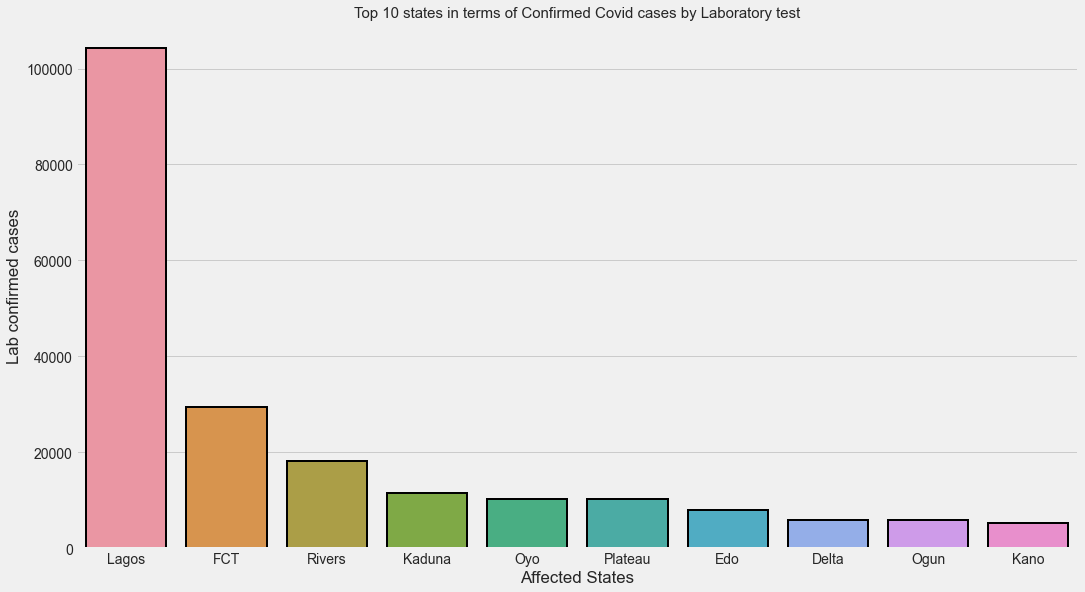

In [53]:
# Barchart to show top 10 states in terms of Confirmed Covid cases by Laboratory test
fig = plt.figure(figsize=(16,9))
plt.title('Top 10 states in terms of Confirmed Covid cases by Laboratory test', size= 15)
ax = sns.barplot(data= df_10_Lab_confirmed, y= "No_of_Lab_Confirmed_Cases", x= "States_Affected", linewidth= 2, edgecolor= "black")
plt.xlabel("Affected States")
plt.ylabel("Lab confirmed cases")
plt.show()

#### B.  Top 10 states in terms of Discharged Covid cases 

In [54]:
df_top_10_states_discharged = df.groupby(by= "States_Affected").max()[['No_of_Lab_Confirmed_Cases', 'No_of_Discharged_Cases']].sort_values(by= 'No_of_Discharged_Cases', ascending= False).reset_index()
df_top_10_states_discharged.head()

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Discharged_Cases
0,Lagos,104187,102372
1,FCT,29508,29240
2,Rivers,18105,17923
3,Kaduna,11619,11529
4,Plateau,10335,10253


In [55]:
df_10_discharged = df_top_10_states_discharged.iloc[:10]
df_10_discharged

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Discharged_Cases
0,Lagos,104187,102372
1,FCT,29508,29240
2,Rivers,18105,17923
3,Kaduna,11619,11529
4,Plateau,10335,10253
5,Oyo,10352,10144
6,Edo,7927,7601
7,Ogun,5810,5717
8,Kano,5359,5171
9,Delta,5813,5170


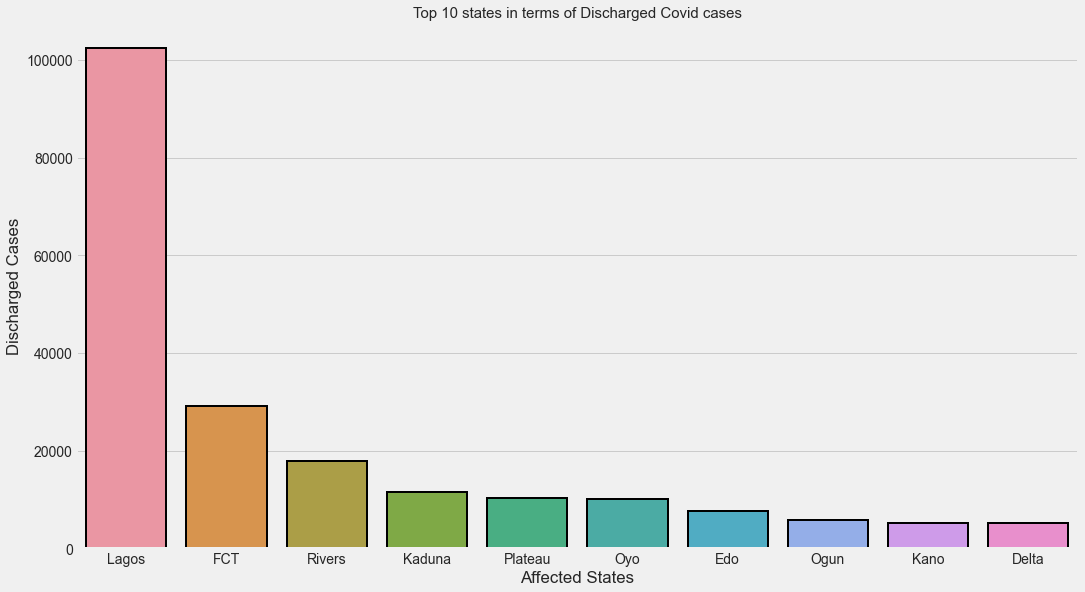

In [56]:
# Barchart to show top 10 states in terms of Discharged Covid cases
fig = plt.figure(figsize= (16,9))
plt.title('Top 10 states in terms of Discharged Covid cases', size= 15)
ax= sns.barplot(data= df_10_discharged, y= 'No_of_Discharged_Cases', x= 'States_Affected', linewidth= 2, edgecolor= 'black')
plt.ylabel('Discharged Cases')
plt.xlabel('Affected States')
plt.show()

#### C.  Top 10 states in terms of Death cases

In [57]:
df_top_10_states_deaths = df.groupby(by= 'States_Affected').max()[['No_of_Lab_Confirmed_Cases', 'No_of_Death_Cases']].sort_values(by= 'No_of_Death_Cases', ascending= False).reset_index()
df_top_10_states_deaths.head()

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Death_Cases
0,Lagos,104187,771
1,Edo,7927,322
2,FCT,29508,249
3,Oyo,10352,202
4,Rivers,18105,155


In [58]:
df_10_deaths = df_top_10_states_deaths.iloc[:10]
df_10_deaths

,States_Affected,No_of_Lab_Confirmed_Cases,No_of_Death_Cases
0,Lagos,104187,771
1,Edo,7927,322
2,FCT,29508,249
3,Oyo,10352,202
4,Rivers,18105,155
5,Kano,5359,127
6,Delta,5813,112
7,Ondo,5173,109
8,Osun,3311,92
9,Kaduna,11619,89


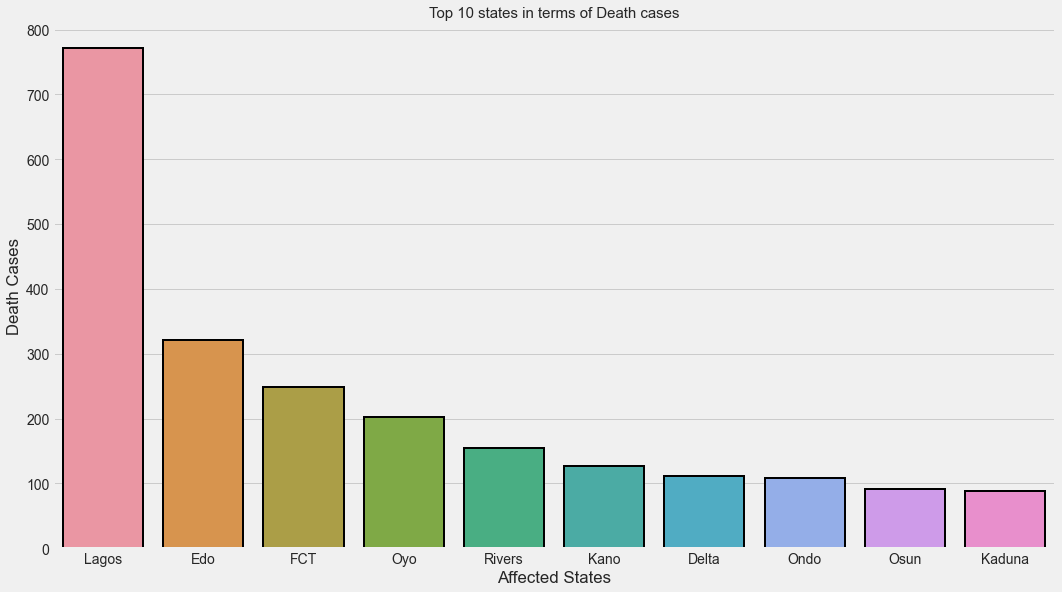

In [59]:
# Barchart to show top 10 states in terms of Death cases
fig = plt.figure(figsize= (16,9))
plt.title("Top 10 states in terms of Death cases", size= 15)
ax= sns.barplot(data= df_10_deaths, x= 'States_Affected', y= 'No_of_Death_Cases', linewidth= 2, edgecolor= 'black')
plt.xlabel('Affected States')
plt.ylabel('Death Cases')
plt.show()

#### D.    Total daily confirmed, recovered and death cases in Nigeria 

In [60]:
confirmed_df_3.head()

,Confirmed_Cases,Date_format
0,0,2020-01-22
1,0,2020-01-23
2,0,2020-01-24
3,0,2020-01-25
4,0,2020-01-26


In [61]:
recovered_df_3.head()

,Recovered_Cases,Date_format
0,0,2020-01-22
1,0,2020-01-23
2,0,2020-01-24
3,0,2020-01-25
4,0,2020-01-26


In [62]:
death_df_3.head()

,Death_Cases,Date_format
0,0,2020-01-22
1,0,2020-01-23
2,0,2020-01-24
3,0,2020-01-25
4,0,2020-01-26


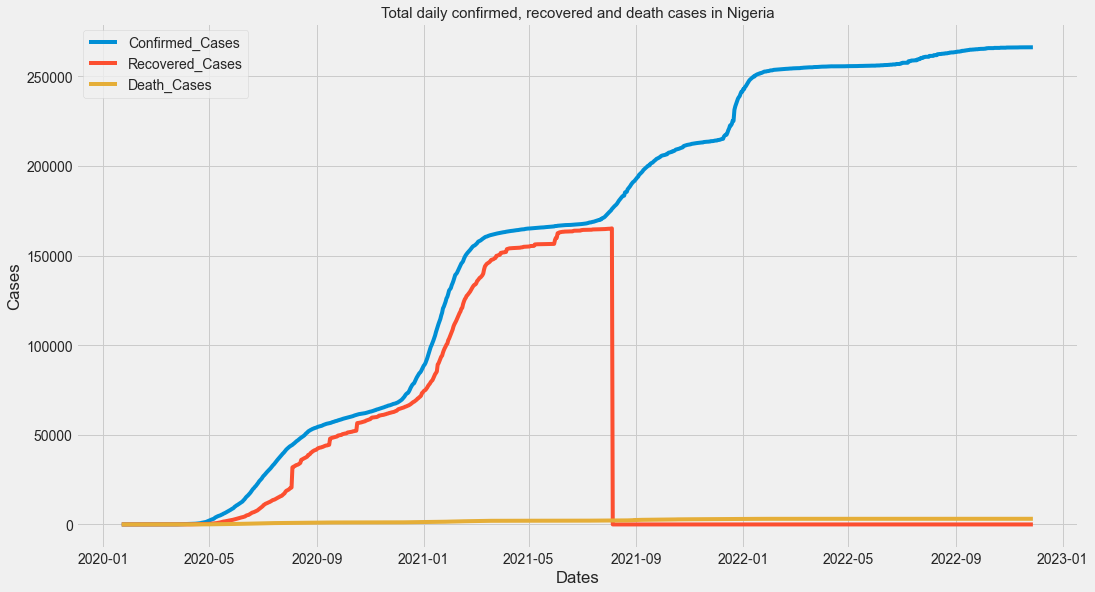

In [63]:
# Linechart to show total daily confirmed, recovered and death cases in Nigeria
fig = plt.figure(figsize = (16,9))
plt.title('Total daily confirmed, recovered and death cases in Nigeria', size= 15)
ax = sns.lineplot(data= confirmed_df_3, x= 'Date_format', y= 'Confirmed_Cases')
ax_1 = sns.lineplot(data= recovered_df_3, x= 'Date_format', y= 'Recovered_Cases')
ax_2 = sns.lineplot(data= death_df_3, x= 'Date_format', y= 'Death_Cases')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.legend(['Confirmed_Cases','Recovered_Cases', 'Death_Cases'])
plt.show()

####   E. Determine the daily infection rate 

In [64]:
confirmed_df_3['infection_rate']= confirmed_df_3['Confirmed_Cases'].diff()
confirmed_df_3.head()

,Confirmed_Cases,Date_format,infection_rate
0,0,2020-01-22,NaN
1,0,2020-01-23,0.0
2,0,2020-01-24,0.0
3,0,2020-01-25,0.0
4,0,2020-01-26,0.0


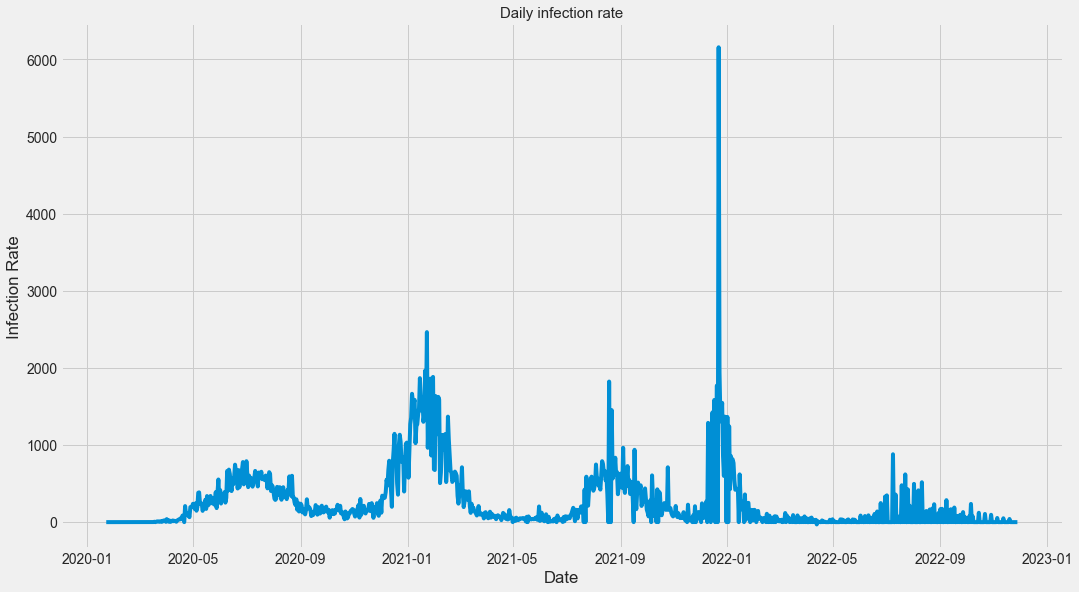

In [65]:
# Line plot to show the daily infection rate
fig = plt.figure(figsize= (16,9))
plt.title('Daily infection rate', size= '15')
ax= sns.lineplot(data= confirmed_df_3, x= 'Date_format', y= 'infection_rate')
plt.xlabel('Date')
plt.ylabel('Infection Rate')
plt.show()

####   F.  Calculate maximum infection rate for a day (Number of new cases)
####        Find the date

In [66]:
infection_rate_max = confirmed_df_3['Confirmed_Cases'].diff().max()
infection_rate_max

6158.0

In [67]:
confirmed_df_3[confirmed_df_3['infection_rate'] == 6158.0]['Date_format']

700   2021-12-22
Name: Date_format, dtype: datetime64[ns]

####  G.   Relationship between the external dataset and the NCDC COVID-19 dataset

In [68]:
covid_external_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [93]:
df.rename(columns= {'States_Affected':'states'}, inplace= True )
df.head()

,states,No_of_Lab_Confirmed_Cases,No_of_Admission_cases,No_of_Discharged_Cases,No_of_Death_Cases
0,Lagos,104187,1044,102372,771
1,FCT,29508,19,29240,249
2,Rivers,18105,27,17923,155
3,Kaduna,11619,1,11529,89
4,Oyo,10352,6,10144,202


In [95]:
df_merge = pd.merge(covid_external_df, df, on= ['states'])
df_merge.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,No_of_Lab_Confirmed_Cases,No_of_Admission_cases,No_of_Discharged_Cases,No_of_Death_Cases
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,29508,19,29240,249
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,10335,7,10253,75
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,4691,452,4175,64
3,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,1183,165,998,20
4,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,2317,88,2204,25


In [71]:
df_merge_1 = df_merge[['No_of_Lab_Confirmed_Cases','Overall CCVI Index']]
df_merge_1.head()

,No_of_Lab_Confirmed_Cases,Overall CCVI Index
0,29508,0.3
1,10335,0.4
2,4691,0.3
3,1183,0.6
4,2317,0.5


In [72]:
df_top_10 = df_merge_1.nlargest(10, 'No_of_Lab_Confirmed_Cases').reset_index().drop(columns= ['index'])
df_top_10

,No_of_Lab_Confirmed_Cases,Overall CCVI Index
0,104187,0.0
1,29508,0.3
2,18105,0.4
3,11619,0.7
4,10352,0.2
5,10335,0.4
6,7927,0.1
7,5813,0.4
8,5810,0.3
9,5359,0.6


In [73]:
df_top_10.rename(columns= {'Overall CCVI Index':'Overall_CCVI_Index'}, inplace= True)
df_top_10

,No_of_Lab_Confirmed_Cases,Overall_CCVI_Index
0,104187,0.0
1,29508,0.3
2,18105,0.4
3,11619,0.7
4,10352,0.2
5,10335,0.4
6,7927,0.1
7,5813,0.4
8,5810,0.3
9,5359,0.6


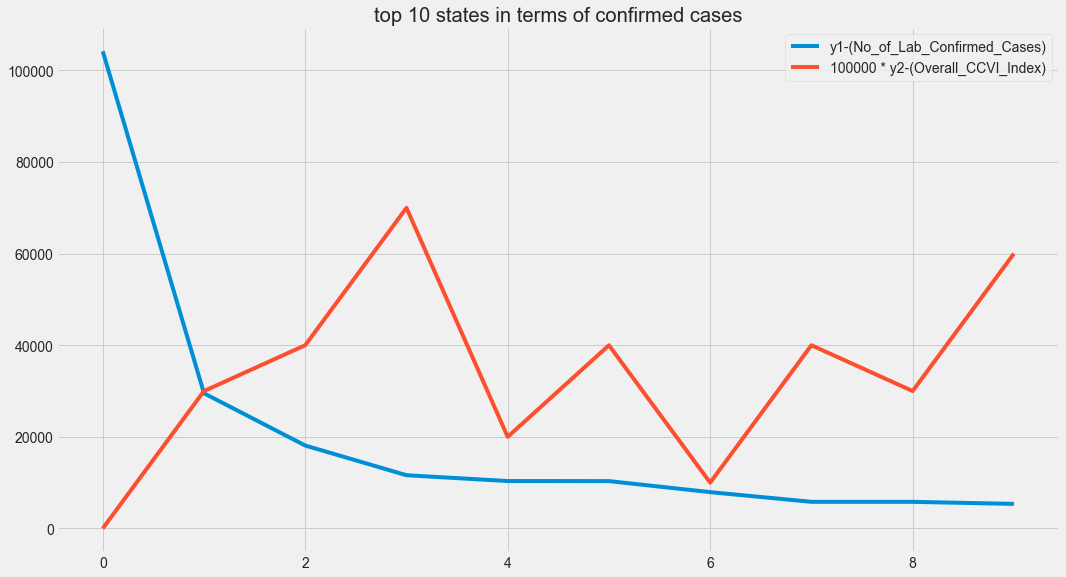

In [74]:
x=  np.arange(10)
y1 = df_top_10['No_of_Lab_Confirmed_Cases']
y2 = df_top_10['Overall_CCVI_Index']
fig = plt.figure(figsize= (16,9))
plt.title('top 10 states in terms of confirmed cases')
plt.plot(x, y1, x, 100000* y2)
plt.legend(['y1-(No_of_Lab_Confirmed_Cases)', '100000 * y2-(Overall_CCVI_Index)'])
plt.show()

####  H.  Determine the relationship between the external dataset and the NCDC COVID-19 dataset.  

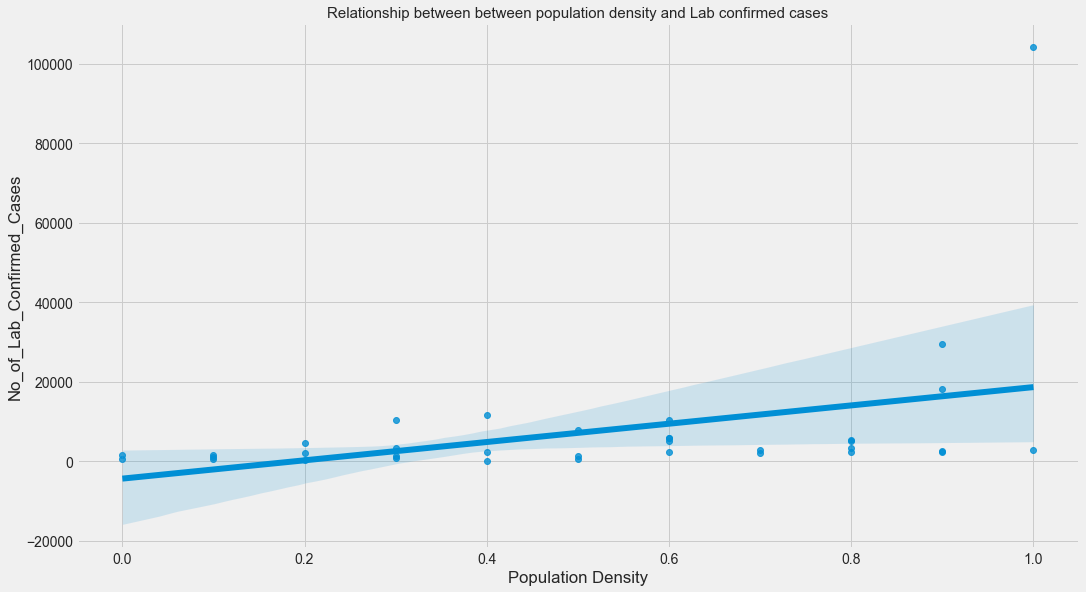

In [75]:
plt.figure(figsize= (16,9))
plt.title('Relationship between between population density and Lab confirmed cases', size= 15)
y1 = df_merge['Population Density']
y2 = df_merge['No_of_Lab_Confirmed_Cases']
sns.regplot(y1, y2 )
plt.show()

####  Observations from the regplot above:

###### From the regplot, it can be seen that there is a linear relationship between the population density and the number of lab confirmed cases. This means that, areas that are densely populated have high number of lab confirmed cases. it can also be seen that there is an outlier, with value of no of lab confirmed cases above  100000 which is far beyound  other values.

####  Checking the relationship between region and no of death cases

In [76]:
df_pie = df_merge[['region', 'No_of_Death_Cases']].groupby(by= 'region').max().sort_values(by= 'No_of_Death_Cases', ascending= False).reset_index()
df_pie

,region,No_of_Death_Cases
0,South West,771
1,South South,322
2,North Central,249
3,North West,127
4,North East,66
5,South East,58


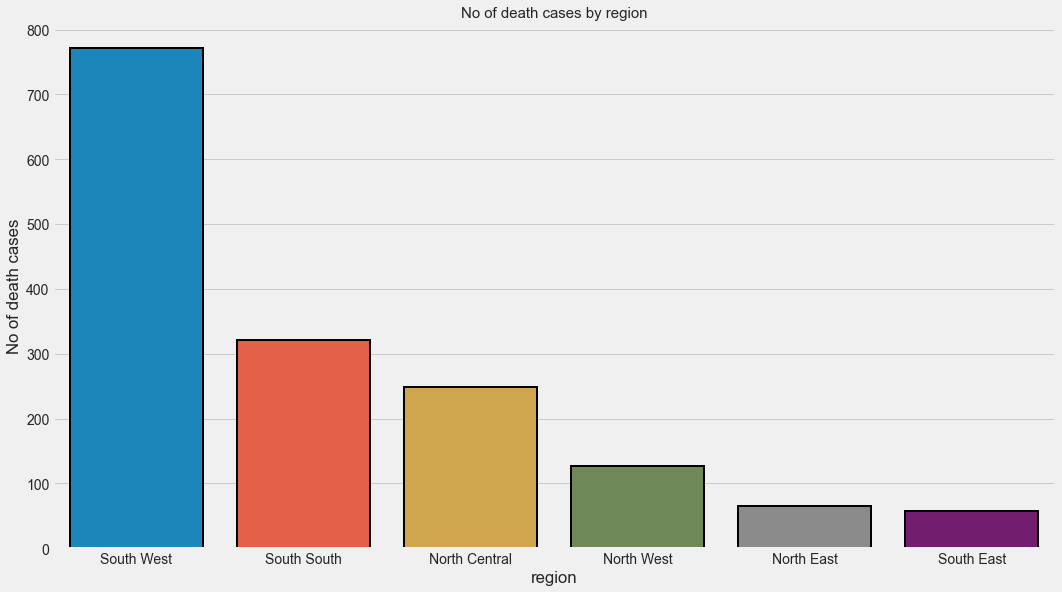

In [77]:
fig = plt.figure(figsize= (16,9))
plt.title('No of death cases by region', size= 15)
ax = sns.barplot(data= df_pie, x= 'region',  y= 'No_of_Death_Cases', linewidth= 2, edgecolor= 'black')
plt.xlabel('region')
plt.ylabel('No of death cases')
plt.show()

#### Observation from the barchart:

##### From the barchart above, it can be observed that the average number of death cases from states in South West region is high.  

#### Distribution of Epidemiological 

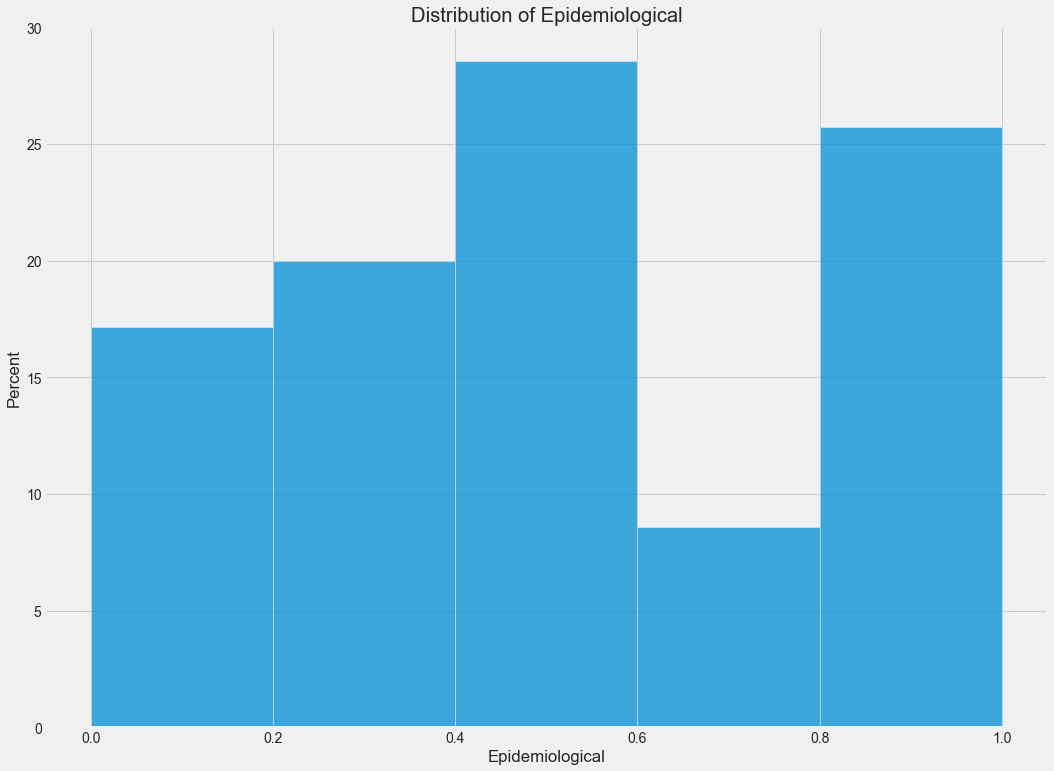

In [78]:
plt.figure(figsize= (16,12))
plt.title('Distribution of Epidemiological')
sns.histplot(data= df_merge, x= 'Epidemiological', binwidth= 0.2, stat= 'percent')
plt.show()

##### Observation from the Histogram:

##### From the above chart, it can be observed that the major Epidemiological is from states having values between 0.4 and 0.6.

##### Relationship between Health System and  No of Death Cases

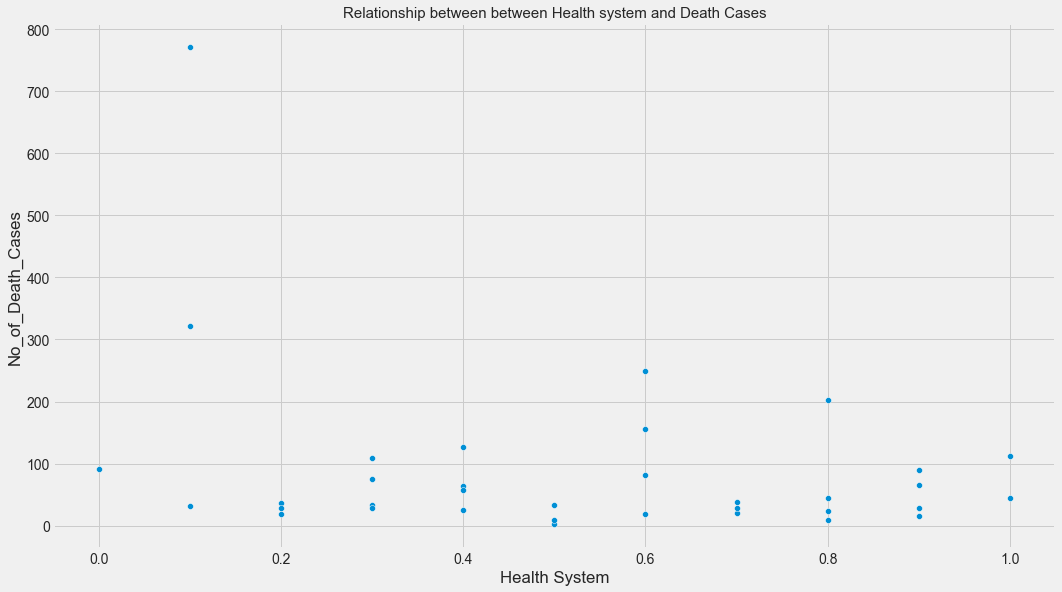

In [79]:
plt.figure(figsize= (16,9))
plt.title('Relationship between between Health system and Death Cases', size= 15)
x= df_merge['Health System']
y= df_merge['No_of_Death_Cases']
sns.scatterplot(x, y)
plt.show()

##### Observations from the scatterplot:

#####  From the above scatterplot, it can be seen that there is a relationship between the Health System and the number of Death cases in each states. The relationship is such that, the better the Health System the lower the number of death cases. Also, it can be observed that, there is an outlier with value greater than 700 which is far greater than other values.

####   I.     Effect of the Pandemic on the economy

In [80]:
real_gdp_df

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [150]:
real_gdp_df_melt = pd.melt(real_gdp_df, id_vars='Year').rename(columns= {'variable':'Quarters', 'value':'GDP_Values'})
real_gdp_df_melt.head()

,Year,Quarters,GDP_Values
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


In [82]:
real_gdp_df_melt_2014 = real_gdp_df_melt[real_gdp_df_melt['Year']== 2014]
real_gdp_df_melt_2014

,Year,Quarters,GDP_Values
0,2014,Q1,15438679.50
7,2014,Q2,16084622.31
14,2014,Q3,17479127.58
21,2014,Q4,18150356.45


In [83]:
real_gdp_df_melt_2015 = real_gdp_df_melt[real_gdp_df_melt['Year']== 2015]
real_gdp_df_melt_2015

,Year,Quarters,GDP_Values
1,2015,Q1,16050601.38
8,2015,Q2,16463341.91
15,2015,Q3,17976234.59
22,2015,Q4,18533752.07


In [84]:
real_gdp_df_melt_2016 = real_gdp_df_melt[real_gdp_df_melt['Year']== 2016]
real_gdp_df_melt_2016

,Year,Quarters,GDP_Values
2,2016,Q1,15943714.54
9,2016,Q2,16218542.41
16,2016,Q3,17555441.69
23,2016,Q4,18213537.29


In [85]:
real_gdp_df_melt_2017 = real_gdp_df_melt[real_gdp_df_melt['Year']== 2017]
real_gdp_df_melt_2017

,Year,Quarters,GDP_Values
3,2017,Q1,15797965.83
10,2017,Q2,16334719.27
17,2017,Q3,17760228.17
24,2017,Q4,18598067.07


In [86]:
real_gdp_df_melt_2018 = real_gdp_df_melt[real_gdp_df_melt['Year']== 2018]
real_gdp_df_melt_2018

,Year,Quarters,GDP_Values
4,2018,Q1,16096654.19
11,2018,Q2,16580508.07
18,2018,Q3,18081342.10
25,2018,Q4,19041437.59


In [87]:
real_gdp_df_melt_2019 = real_gdp_df_melt[real_gdp_df_melt['Year']== 2019]
real_gdp_df_melt_2019

,Year,Quarters,GDP_Values
5,2019,Q1,16434552.65
12,2019,Q2,16931434.89
19,2019,Q3,18494114.17
26,2019,Q4,19530000.00


In [88]:
real_gdp_df_melt_2020 = real_gdp_df_melt[real_gdp_df_melt['Year']== 2020]
real_gdp_df_melt_2020

,Year,Quarters,GDP_Values
6,2020,Q1,16740000.0
13,2020,Q2,15890000.0
20,2020,Q3,17820000.0
27,2020,Q4,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

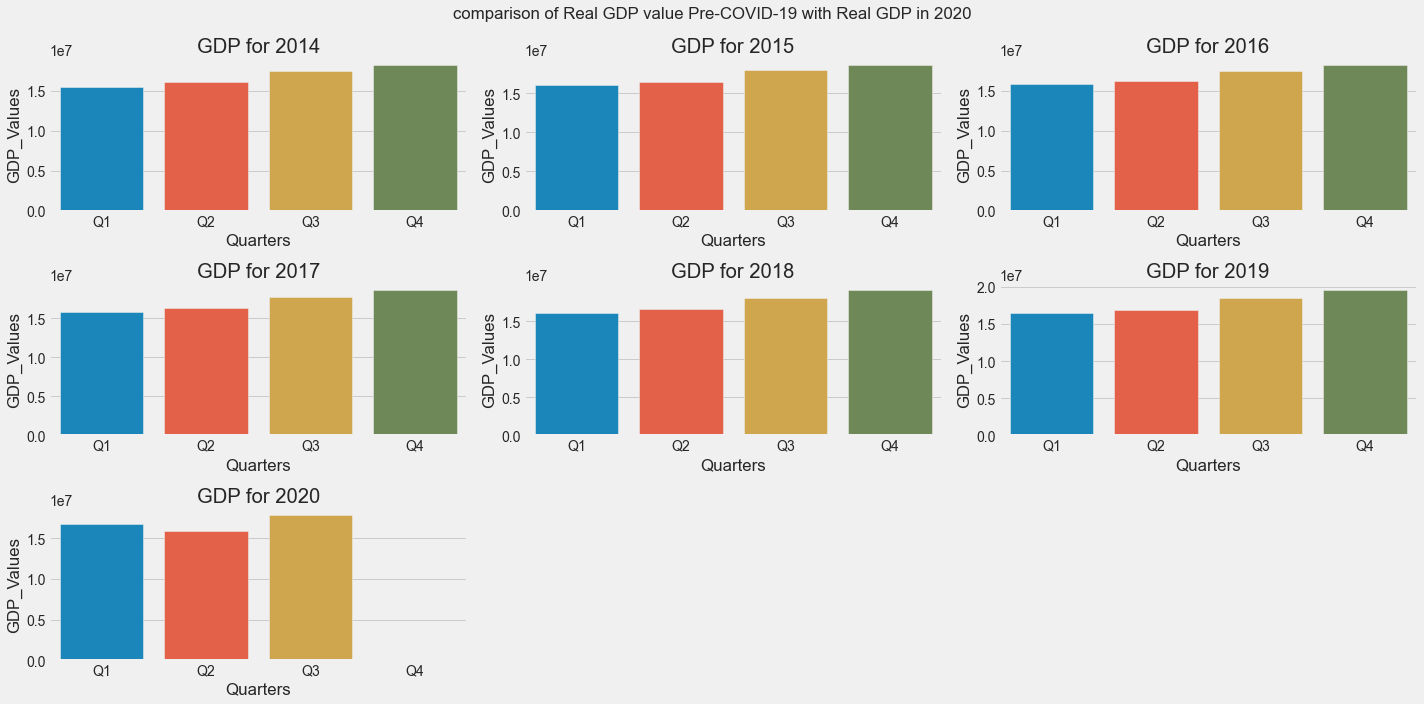

In [89]:
fig= plt.figure(figsize= (20, 10))
fig.suptitle('comparison of Real GDP value Pre-COVID-19 with Real GDP in 2020')


plt.subplot(331)
plt.title('GDP for 2014')
sns.barplot(data= real_gdp_df_melt_2014, x= 'Quarters', y= 'GDP_Values')

plt.subplot(332)
plt.title('GDP for 2015')
sns.barplot(data= real_gdp_df_melt_2015, x= 'Quarters', y= 'GDP_Values')

plt.subplot(333)
plt.title('GDP for 2016')
sns.barplot(data= real_gdp_df_melt_2016, x= 'Quarters', y= 'GDP_Values')

plt.subplot(334)
plt.title('GDP for 2017')
sns.barplot(data= real_gdp_df_melt_2017, x= 'Quarters', y= 'GDP_Values')

plt.subplot(335)
plt.title('GDP for 2018')
sns.barplot(data= real_gdp_df_melt_2018, x= 'Quarters', y= 'GDP_Values')

plt.subplot(336)
plt.title('GDP for 2019')
sns.barplot(data= real_gdp_df_melt_2019, x= 'Quarters', y= 'GDP_Values')

plt.subplot(337)
plt.title('GDP for 2020')
sns.barplot(data= real_gdp_df_melt_2020, x= 'Quarters', y= 'GDP_Values')




plt.tight_layout()
plt.show

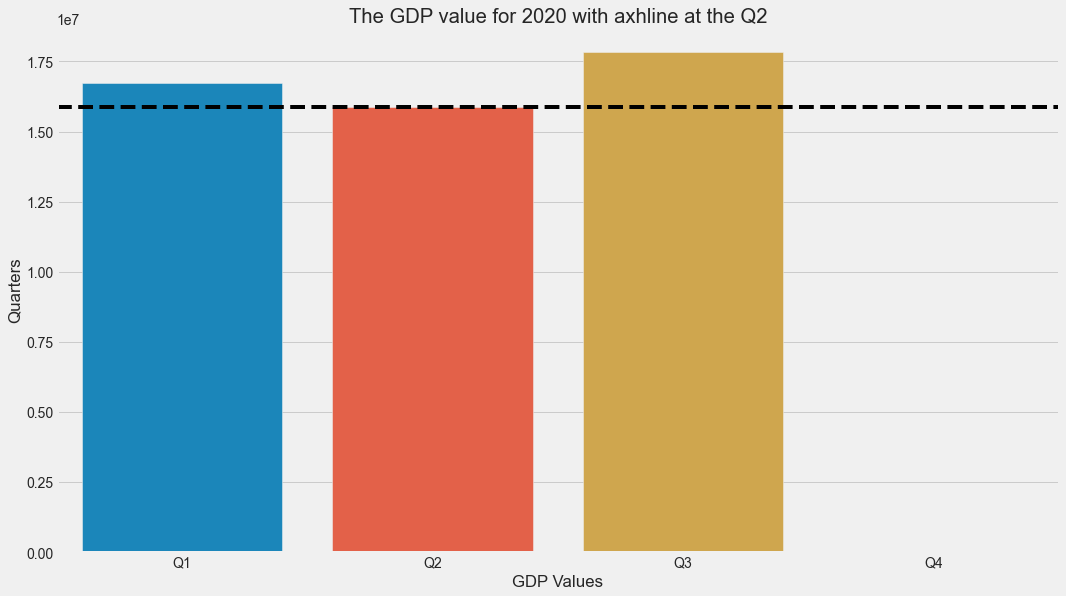

In [90]:
plt.figure(figsize= (16,9))
plt.title('The GDP value for 2020 with axhline at the Q2')
sns.barplot(data= real_gdp_df_melt_2020, x= 'Quarters', y= 'GDP_Values')
plt.xlabel('GDP Values')
plt.ylabel('Quarters')
plt.axhline(y= 15890000.0, ls= '--', color= 'black' )
plt.show()


##### Observation from the barplot and subplot:

##### From the plot above, it can be observed that, the Real GDP Value increases from Q1 to Q2 for other years except for 2020 where the Real GDP value falls.

### Budget Data

In [113]:
df_budget = pd.read_csv('Budget data.csv')
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [121]:
df_budget['Initial_budget'] = 1000000000 * df_budget['Initial_budget (Bn)']

In [122]:
df_budget['Revised_budget'] = 1000000000 * df_budget['Revised_budget (Bn)']

In [123]:
df_budget.drop(columns= ['Initial_budget (Bn)','Revised_budget (Bn)'], inplace= True)

In [124]:
df_budget.head()

,states,Initial_budget,Revised_budget
0,Abia,1.366000e+11,1.027000e+11
1,Adamawa,1.833000e+11,1.393100e+11
2,Akwa-Ibom,5.977300e+11,3.660000e+11
3,Anambra,1.371000e+11,1.128000e+11
4,Bauchi,1.672000e+11,1.280000e+11


In [125]:
df_budget.dtypes

states             object
Initial_budget    float64
Revised_budget    float64
dtype: object

In [128]:
df_budget['Revised_amount'] = df_budget['Initial_budget'] - df_budget['Revised_budget']
df_budget.head()

,states,Initial_budget,Revised_budget,Revised_amount
0,Abia,1.366000e+11,1.027000e+11,3.390000e+10
1,Adamawa,1.833000e+11,1.393100e+11,4.399000e+10
2,Akwa-Ibom,5.977300e+11,3.660000e+11,2.317300e+11
3,Anambra,1.371000e+11,1.128000e+11,2.430000e+10
4,Bauchi,1.672000e+11,1.280000e+11,3.920000e+10


In [149]:
df_budget['Revised_percent'] = df_budget['Revised_amount']*100/df_budget['Initial_budget']
df_budget.head()

,states,Initial_budget,Revised_budget,Revised_amount,Revised_percent
0,Abia,1.366000e+11,1.027000e+11,3.390000e+10,24.816984
1,Adamawa,1.833000e+11,1.393100e+11,4.399000e+10,23.998909
2,Akwa-Ibom,5.977300e+11,3.660000e+11,2.317300e+11,38.768340
3,Anambra,1.371000e+11,1.128000e+11,2.430000e+10,17.724289
4,Bauchi,1.672000e+11,1.280000e+11,3.920000e+10,23.444976


In [151]:
df_top_10_percent = df_budget.nlargest(10, 'Revised_percent').reset_index()
df_top_10_percent

,index,states,Initial_budget,Revised_budget,Revised_amount,Revised_percent
0,8,Cross River,1.100000e+12,1.471000e+11,9.529000e+11,86.627273
1,23,Lagos,1.680000e+12,9.205000e+11,7.595000e+11,45.208333
2,15,Imo,1.976000e+11,1.083000e+11,8.930000e+10,45.192308
3,31,Rivers,5.308000e+11,3.004000e+11,2.304000e+11,43.406179
4,21,Kogi,1.760000e+11,1.020000e+11,7.400000e+10,42.045455
5,24,Nasarawa,1.084000e+11,6.296000e+10,4.544000e+10,41.918819
6,2,Akwa-Ibom,5.977300e+11,3.660000e+11,2.317300e+11,38.768340
7,26,Ogun,4.499000e+11,2.800000e+11,1.699000e+11,37.763948
8,6,Benue,1.890000e+11,1.190000e+11,7.000000e+10,37.037037
9,25,Niger,1.550000e+11,9.800000e+10,5.700000e+10,36.774194


In [152]:
df_top_10_percent.drop(columns= ['index'], inplace= True)

In [153]:
df_top_10_percent

,states,Initial_budget,Revised_budget,Revised_amount,Revised_percent
0,Cross River,1.100000e+12,1.471000e+11,9.529000e+11,86.627273
1,Lagos,1.680000e+12,9.205000e+11,7.595000e+11,45.208333
2,Imo,1.976000e+11,1.083000e+11,8.930000e+10,45.192308
3,Rivers,5.308000e+11,3.004000e+11,2.304000e+11,43.406179
4,Kogi,1.760000e+11,1.020000e+11,7.400000e+10,42.045455
5,Nasarawa,1.084000e+11,6.296000e+10,4.544000e+10,41.918819
6,Akwa-Ibom,5.977300e+11,3.660000e+11,2.317300e+11,38.768340
7,Ogun,4.499000e+11,2.800000e+11,1.699000e+11,37.763948
8,Benue,1.890000e+11,1.190000e+11,7.000000e+10,37.037037
9,Niger,1.550000e+11,9.800000e+10,5.700000e+10,36.774194


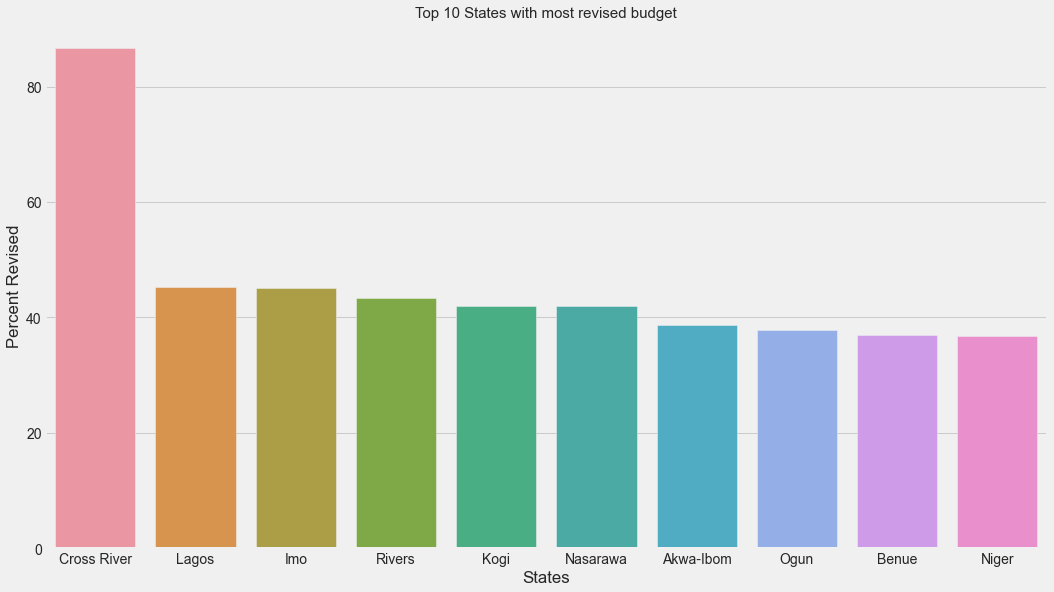

In [154]:
plt.figure(figsize= (16,9))
plt.title('Top 10 States with most revised budget', size= 15)
sns.barplot(data= df_top_10_percent, x= 'states', y= 'Revised_percent')
plt.xlabel('States')
plt.ylabel('Percent Revised')
plt.show()

### Observation from the barplot:

###### States are affected by the pandemic and thus result to revising its budget. From the chart above, it is observed that Cross river state is affected the most  and therefore, revised its budget most.